<a href="https://colab.research.google.com/github/Dewak20/Dibimbing/blob/main/Dewa_Gede_Krishnadana_Causal_Analysis_II_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Essay Test

- Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?

- Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?

- Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!

- Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. 
Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?

#1
Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?

Proses matching dilakukan agar variable yang ingin diukur efect treatmentnya mempunyai karakteristik atau kelompok yang sama, maka perlu dimatching untuk mencari data yang sama atau mirip. jika tidak dimatching terlebih dahulu bisa jadi ada beberapa data yang diluar karakteristik dan hal ini dapat membiaskan hasil analisis. Sama seperti kasus pemberian obat herbal untuk meningkatkan daya tahan tubuh. jika sample yang dipakai tidak dimatching dimana samplenya terdiri dari orang tua dan remaja maka bisa jadi umur yang mempengaruhi keberhasilannya bukan obatnya. maka perlu dimatching agar sample yang digunakan sama berdasarkan umur.

#2
Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?

Double ML itu lebih baik dengan Double selection karena memang Double ML adalah pembaharuan dari double decision yang mana dalam model double decision ada beberapa masalah yaitu tidak bisa bisa melihat data secara heterogen. Double decision melihat semua orang itu homogen. Selain itu model ini juga menggunakan cara yang lebih simple.

#3
Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!

- ATE digunakan ketika ingin mengukur efect dari treatment ke variable secara rata2 atau simplenya melihat berapa rata pengaruh treatment ke variable
- CATE hampir sama dengan ATE tapi bedanya ada pada kondisinya. Jadi nanti pengaruh dari treatment yang diberikan akan diukur berdasarkan beberapa kondisi. Contohnya jika ingin melihat berapa besar efect treatment obat kanker berdasarkan usia pasien. jadi konisinya berdasarkan rentangan umur si pasiennya.
- LATE digunakan ketika sample yang ingin ditreatment tidak berkeinginan atau tidak sesuai dengan prosedur yang dilakukan ketika treatment diberikan

#4
Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?

Menurut pendapat saya mungkin metode yang lebih baik adalah menggunakan double ML. Karena ini sudah bisa digunakan pada data yang heterogen dan juga memiliki perhitungan yang lebih complex. Metode interpretable machine learning dapat digunakan untuk analisis kausal ketika kita ingin mengatahui sebuah efect dari treatment yang kita berikan pada suatu variable.

# Install and Load Packages

In [ ]:
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.6 MB/s 
     |████████████████████████████████| 164 kB 42.6 MB/s 
     |████████████████████████████████| 564 kB 53.7 MB/s 
     |████████████████████████████████| 77 kB 1.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

# Load Dataset

In [ ]:
# dataset
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")
df.head(5)

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [ ]:
# split data into training data and test data
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

# Simple Data Inspection and Exploration

In [ ]:
# check email_train data structure
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8312 entries, 10379 to 8510
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                8312 non-null   int64  
 1   intervention            8312 non-null   int64  
 2   achievement_score       8312 non-null   float64
 3   success_expect          8312 non-null   int64  
 4   ethnicity               8312 non-null   int64  
 5   gender                  8312 non-null   int64  
 6   frst_in_family          8312 non-null   int64  
 7   school_urbanicity       8312 non-null   int64  
 8   school_mindset          8312 non-null   float64
 9   school_achievement      8312 non-null   float64
 10  school_ethnic_minority  8312 non-null   float64
 11  school_poverty          8312 non-null   float64
 12  school_size             8312 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 909.1 KB


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 4429 to 1668
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                2079 non-null   int64  
 1   intervention            2079 non-null   int64  
 2   achievement_score       2079 non-null   float64
 3   success_expect          2079 non-null   int64  
 4   ethnicity               2079 non-null   int64  
 5   gender                  2079 non-null   int64  
 6   frst_in_family          2079 non-null   int64  
 7   school_urbanicity       2079 non-null   int64  
 8   school_mindset          2079 non-null   float64
 9   school_achievement      2079 non-null   float64
 10  school_ethnic_minority  2079 non-null   float64
 11  school_poverty          2079 non-null   float64
 12  school_size             2079 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 227.4 KB


# Double Machine Learning

Alasan kenapa saya menggunakan Double Machine Learning adalah karena lebih jelas dalam memapaparkan data dalam bentuk yang mana outcome, treatment dan covariates

## Data Setup

In [ ]:
# outcome
y = "school_achievement"
# treatment
T = "intervention"
# covariates
X = ['achievement_score',	'success_expect', 'school_mindset']

- School Achievement saya pilih sebagai outcome karena variable tersebut yang akan terkena dapat dari treatment seminar atau intervention. 
- Intervention saya pilih karena variabel ini yang menjadi treatment atau variabel yang ingin di observasi atau dilihat efeknya
- Covariates berikut: ['achievement_score',	'success_expect', 'school_mindset'] saya pilih karena variabel ini yang memiliki corelasi yang masuk akal 

In [ ]:
training_data[y]

10379   -1.129889
10147   -0.122386
132     -0.449943
2155    -0.588563
9286    -0.753309
           ...   
8447    -0.699595
2934    -0.180831
10383   -1.129889
6618    -0.287379
8510    -0.019039
Name: school_achievement, Length: 8312, dtype: float64

In [ ]:
training_data[T]

10379    0
10147    0
132      1
2155     1
9286     0
        ..
8447     0
2934     1
10383    0
6618     0
8510     0
Name: intervention, Length: 8312, dtype: int64

In [ ]:
training_data[X]

,achievement_score,success_expect,school_mindset
10379,-0.838257,3,1.185986
10147,1.870123,5,0.208298
132,-1.400742,3,0.983982
2155,-0.189982,5,-0.283624
9286,-0.099046,5,0.230570
...,...,...,...
8447,0.283091,5,1.235106
2934,-0.247472,6,0.400799
10383,0.233190,5,1.185986
6618,-1.775131,2,1.099419


## Modeling

In [ ]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_t = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [ ]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(training_data[y], T = training_data[T], X = training_data[X], inference="bootstrap")

In [ ]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
achievement_score,0.012,0.009,1.386,0.06,-0.004,0.026
success_expect,-0.007,0.009,-0.855,0.16,-0.021,0.013
school_mindset,-0.004,0.005,-0.734,0.23,-0.012,0.005
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.039,0.047,0.834,0.19,-0.074,0.108


Based on the result we can interpret the model:
- Model kurang bagus karena nilai **pvalue ** diatas **0.05**
- Achievement score punya efek postive yang berarti jika nilai achievement value meningkat maka school schievement juga meningkat

In [ ]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(training_data[X])

In [ ]:
# Measure price effect
np.mean(te_pred)

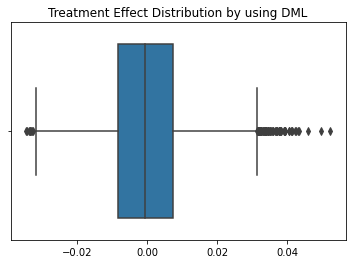

In [ ]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");